In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.readoutrandom import ReadoutRandomExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import os
from time import time

In [2]:
# Initilizes the experiment and utils
exp = ReadoutRandomExperiment()
utils = Utils.instance()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

1.187

In [4]:
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:44175
INFO:DRV:      Host server up..............Done 0.44s
INFO:DRV:      Encoding axons/synapses.....Done 18.09s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1593004177.9860702
Include dir is : /home/seq/05-reward/v0.x/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1593004177.9860702/initnetwork_0_0.c
gcc -Wall -I/home/seq/05-reward/v0.x/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -st

INFO:DRV:      Compiling Embedded snips....Done 6.01s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1593004177.9860702/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1593004177.9860702/launcher_chip1_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.27s
INFO:DRV:      Encoding probes.............Done 0.01s
INFO:DRV:      Configuring registers.......Done 17.61s
INFO:DRV:      Transferring spikes.........Done 0.05s
INFO:DRV:      Transferring probes.........Done 0.03s
INFO:HST:  chip=0 cpu=0 Transfered values 20, 245, 30 
INFO:HST:  chip=1 cpu=0 Transfered values 20, 245, 30 
INFO:HST:  chip=0 cpu=0 Reset current/volta

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3920 to 3950
INFO:HST:  chip=1 cpu=0 Reset functional state at 3950
INFO:HST:  chip=0 cpu=0 Reset functional state at 3950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4165 to 4195
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4165 to 4195
INFO:HST:  chip=0 cpu=0 Reset functional state at 4195
INFO:HST:  chip=1 cpu=0 Reset functional state at 4195
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4410 to 4440
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4410 to 4440
INFO:HST:  chip=1 cpu=0 Reset functional state at 4440
INFO:HST:  chip=0 cpu=0 Reset functional state at 4440
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4655 to 4685
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4655 to 4685
INFO:HST:  chip=1 cpu=0 Reset functional state at 4685
INFO:HST:  chip=0 cpu=0 Reset functional state at 4685
INFO:HST:  chip=0 cpu=0 Reset current/volt

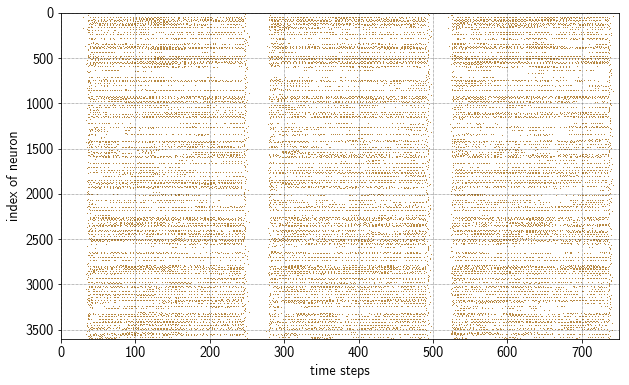

In [5]:
exp.net.plot.reservoirSpikeTrain(fr=0, to=750, colorEx=exp.p.pltColor4, figsize=(10,6))

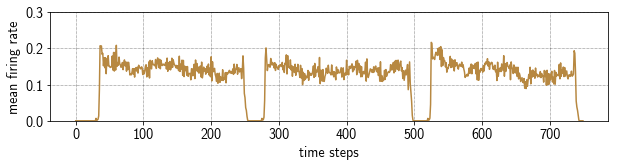

In [6]:
exp.net.plot.reservoirRates(fr=0, to=750, ylim=(0.0,0.3), colorEx=exp.p.pltColor4, figsize=(10,2))

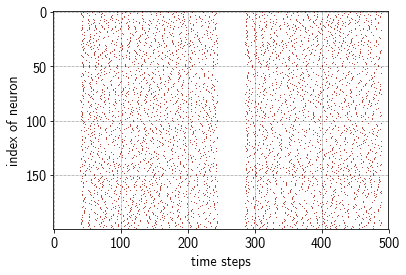

In [7]:
exp.net.plot.outputSpikeTrain(fr=0, to=500)

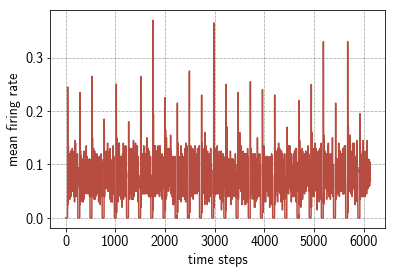

In [8]:
exp.net.plot.outputRates()

In [10]:
np.save('data/comparison/spikes_ex-random.npy', exp.net.exSpikeData)
np.save('data/comparison/spikes_out-random.npy', exp.net.outSpikeData)

In [11]:
exp.net.outSpikeData.shape

(25, 200, 210)

In [12]:
exp.target.shape

(3, 200)

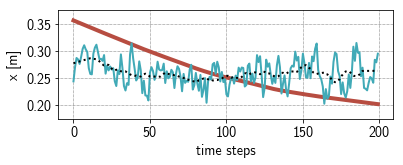

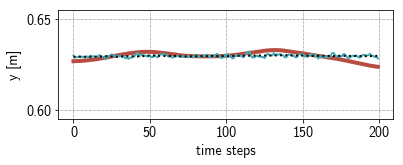

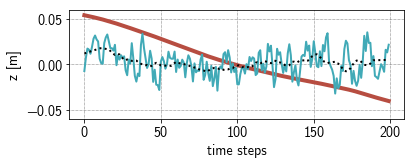

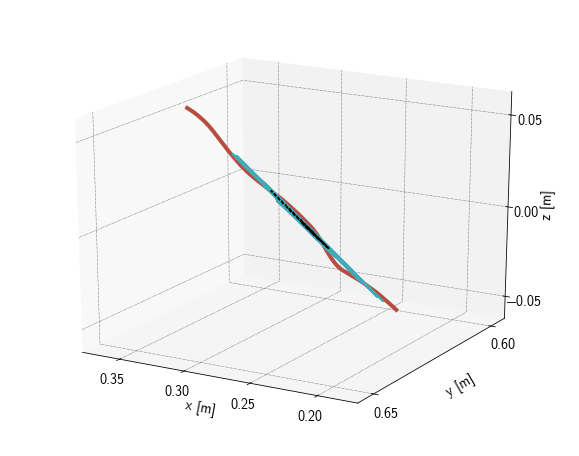

In [22]:
"""
Generalisation Pool
"""
# Prepare data
(x, xe, y) = utils.prepareDataset(exp.net.outSpikeData, exp.target)

# Estimate and plot x-dim
x1 = utils.estimateMovement(x, xe, y[0])
exp.net.plot.movement1D(x1, exp.target[0], dim='x', ylim=(0.175,0.375), figsize=(6,2))

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(x2, exp.target[1], dim='y', ylim=(0.595,0.655), figsize=(6,2))

# Estimate and plot z-dim
x3 = utils.estimateMovement(x, xe, y[2])
exp.net.plot.movement1D(x3, exp.target[2], dim='z', ylim=(-0.06,0.06), figsize=(6,2))

# Plot 3D
exp.net.plot.movement3D(
    [x1, x2, x3], exp.target, figsize=(10,8),
    xlim=(0.175,0.375), ylim=(0.595,0.655), zlim=(-0.06,0.06)
)

In [23]:
exp.net.plot.plotDir

'/home/seq/05-reward/v0.x/datalog/2020-06-15_17-43-59/plots/'

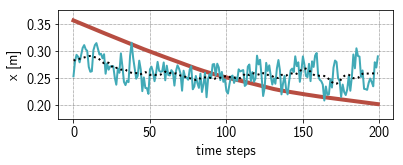

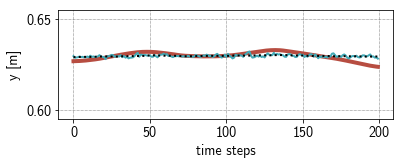

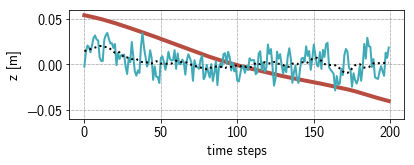

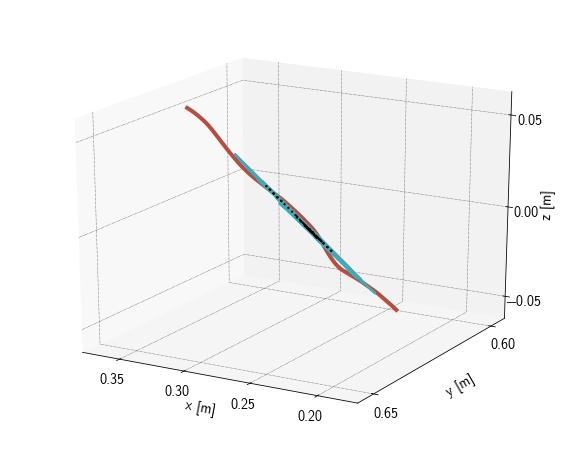

In [24]:
"""
Representation Reservoir
"""
# Prepare data
(x, xe, y) = utils.prepareDataset(exp.net.outSpikeData, exp.target, trainTrials=np.repeat(True, exp.p.trials))

# Estimate and plot x-dim
x1 = utils.estimateMovement(x, xe, y[0])
exp.net.plot.movement1D(x1, exp.target[0], dim='x', ylim=(0.175,0.375), figsize=(6,2))

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(x2, exp.target[1], dim='y', ylim=(0.595,0.655), figsize=(6,2))

# Estimate and plot z-dim
x3 = utils.estimateMovement(x, xe, y[2])
exp.net.plot.movement1D(x3, exp.target[2], dim='z', ylim=(-0.06,0.06), figsize=(6,2))

# Plot 3D
exp.net.plot.movement3D(
    [x1, x2, x3], exp.target, figsize=(10,8),
    xlim=(0.175,0.375), ylim=(0.595,0.655), zlim=(-0.06,0.06)
)

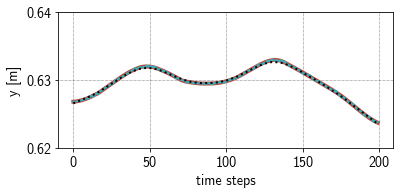

In [25]:
"""
Representation Reservoir
"""
# Prepare data
(x, xe, y) = utils.prepareDataset(
    exp.net.exSpikeData, exp.target, trainTrials=np.repeat(True, exp.p.trials))

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(
    x2, exp.target[1], dim='y', ylim=(0.62,0.64), figsize=(6,2.5),
    precision=100, suffix='random_representation_reservoir'
)

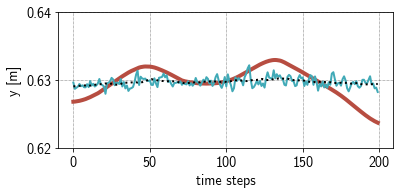

In [26]:
"""
Representation Pool
"""
# Prepare data
(x, xe, y) = utils.prepareDataset(
    exp.net.outSpikeData, exp.target, trainTrials=np.repeat(True, exp.p.trials))

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(
    x2, exp.target[1], dim='y', ylim=(0.62,0.64), figsize=(6,2.5),
    precision=100, suffix='random_representation_pool'
)

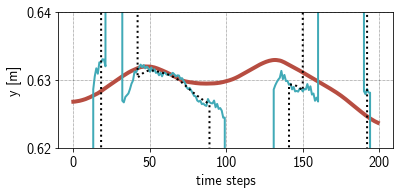

In [27]:
"""
Generalisation Reservoir
"""
testTrial = 20

trainTrials=np.repeat(True, exp.p.trials)
trainTrials[testTrial] = False

# Prepare data
(x, xe, y) = utils.prepareDataset(
    exp.net.exSpikeData, exp.target)#, trainTrials=trainTrials, testTrial=testTrial)

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(
    x2, exp.target[1], dim='y', ylim=(0.62,0.64), figsize=(6,2.5),
    precision=100, suffix='random_generalisation_reservoir'
)

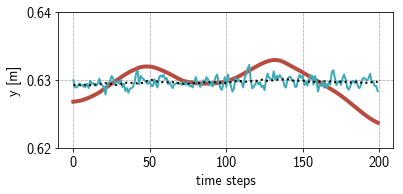

In [28]:
"""
Generalisation Pool
"""

testTrial = 20

trainTrials=np.repeat(True, exp.p.trials)
trainTrials[testTrial] = False

# Prepare data
(x, xe, y) = utils.prepareDataset(
    exp.net.outSpikeData, exp.target)

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(
    x2, exp.target[1], dim='y', ylim=(0.62,0.64), figsize=(6,2.5),
    precision=100, suffix='random_generalisation_pool'
)

In [30]:
filePath = 'data/robot2/hide_rec_dmp.txt'
targets = np.loadtxt(filePath)

files = [
    'hide_rec_dmp.txt',
    'move_up_rec_dmp.txt',
    'put_on_top_rec_dmp.txt',
    'unhide_rec_dmp.txt',
    'move_down_rec.txt',
    'pick_and_place_rec_dmp.txt',
    'take_down_rec_dmp.txt'
]

targets = np.array([ np.loadtxt('data/robot2/'+file)[-200:,0:3] for file in files ])
targets = np.moveaxis(targets, 1, 2)

In [38]:
"""
Mutiple targets
"""

# Representation Reservoir
estimatesRepRes = utils.estimateMultipleTrajectories3D(exp.net.exSpikeData, targets, trainTrials=np.repeat(True, exp.p.trials))
# Representation Pool
estimatesRepPoo = utils.estimateMultipleTrajectories3D(exp.net.outSpikeData, targets, trainTrials=np.repeat(True, exp.p.trials))
# Generalisation Reservoir
estimatesGenRes = utils.estimateMultipleTrajectories3D(exp.net.exSpikeData, targets)
# Generalisation Pool
estimatesGenPoo = utils.estimateMultipleTrajectories3D(exp.net.outSpikeData, targets)

100%|██████████| 7/7 [00:01<00:00,  4.49it/s]


In [39]:
def calcMSE(estimates):
    mse = []
    for i in range(targets.shape[0]):
        mse.append(np.mean([np.mean(np.square(estimates[i,j] - targets[i,j])) for j in range(3)]))
    return mse

In [49]:
mse = np.array([
    calcMSE(estimatesRepRes),
    calcMSE(estimatesRepPoo),
    calcMSE(estimatesGenRes),
    calcMSE(estimatesGenPoo)
])

In [50]:
mseMeans = np.mean(mse, axis=1)

In [51]:
mseMeans

array([2.06517274e-06, 5.33804504e-03, 9.09230819e+18, 6.48405306e-03])

In [52]:
#np.save('data/trajectories_randomly.npy', mse)